In [1]:
import numpy as np
class Perceptron(object):
    def __init__(self,lr=0.01,n_iter=10):
        self.lr=lr
        self.n_iter=n_iter
    def fit(self,X,y):
        self.weights=np.zeros(X.shape[1])
        self.bias=0.0
        for _ in range(self.n_iter):
            for xi,yi in zip(X,y):
                delta=self.lr*(yi-self.predict(xi))
                self.weights+=delta*xi
                self.bias+=delta
    def predict(self,X):
        return np.where(np.dot(X,self.weights)+self.bias>=0.0,1,-1)
    """np.where(cond,x,y):滿足條件輸出x,否則輸出y
    np.dot:計算矩陣乘積"""

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=100,centers=2,cluster_std=2.2,random_state=42)
y=2*y-1

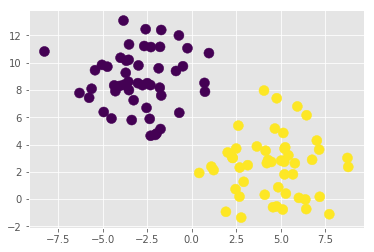

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.scatter(X[:,0],X[:,1],s=100,c=y)
plt.xlabel=('x1')
plt.ylabel=('x2')

In [4]:
p=Perceptron(lr=0.1,n_iter=10)
p.fit(X,y)

In [5]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [6]:
p.bias

0.2

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X),y)

1.0

In [8]:
def plot_decision_boundary(classifier,x_test,y_test):
                 #create a mesh to plot in 
    h=0.02   #step size in mesh
    x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
    y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    x_hypo=np.c_[xx.ravel().astype(np.float32),yy.ravel().astype(np.float32)]
    zz=classifier.predict(x_hypo)
    zz=zz.reshape(xx.shape)
    
    plt.contourf(xx,yy,zz,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=100)

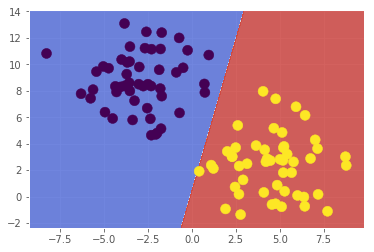

In [9]:
plot_decision_boundary(p,X,y)

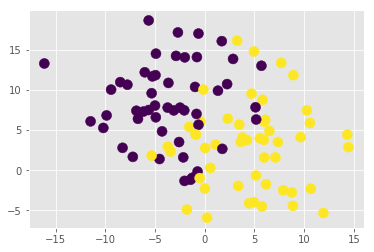

In [10]:
X,y=make_blobs(n_samples=100,centers=2,cluster_std=5.2,random_state=42)
y=2*y-1
plt.scatter(X[:,0],X[:,1],s=100,c=y)
plt.xlabel=('x1')
plt.ylabel=('x2')

In [11]:
p=Perceptron(lr=0.1,n_iter=10)
p.fit(X,y)
accuracy_score(p.predict(X),y)

0.81

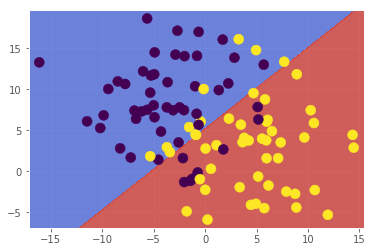

In [12]:
plot_decision_boundary(p,X,y)
plt.xlabel=('x1')
plt.ylabel=('x2')